<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">University of London: BSc Computer Science (Final Project)</div>
<div style="text-align: center; font-size: 30px; margin-top: 10px;">Using Neural Network based Graph Model for Alzhiemer's Classification</div>
<br>
<div style="text-align: center; font-size: 20px; margin-top: 10px;">Pragya Modi</div>
<div style="text-align: center; font-size: 20px; margin-top: 15px;">190308090</div>

<div style="font-size: 70px; font-weight: bold; border-bottom: 6px solid black; padding-bottom:20px ">5. Comparing with the Image Model</div>


<div style="font-size: 30px; padding:10px">
<h1>5.1 Overview</h1>

<p>
The aim of this research is to build a multi-input deep learning graph model to classify for Alzhiemers. The main model takes MRI Scans and patient demographics as an input to provide a prediction. 
</p>

<p>
Since more of the past studies focus on using only MRI scans, this section compares the graph model built with a model built using only the image node of the graph model. This comparision is helpful in understanding whether a multi-input model is neccessary to classify for Alzhiemer's. 
</p>
</div>


<div style="font-size: 30px; padding:10px">
<h1>5.2 Splitting the Data</h1>
</div>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from matplotlib import pyplot as plt
import os, shutil, pathlib
from tensorflow import keras
import numpy as np

import helpers

In [2]:
# load the tensorflow dataset
dataset = tf.data.experimental.load('../data/tfdataset/final_dataset.tfrecords.gz', compression='GZIP')

# print the size of the dataset
dataset_size = 0
for _ in dataset: dataset_size += 1
print(dataset_size)

dataset = dataset.map(lambda x, y: (x['images'], y))

# define the train, val, and test split ratios
train_size = int(0.6 * dataset_size)
val_size = int(0.15 * dataset_size)

# shuffle the dataset
dataset = dataset.shuffle(buffer_size=dataset_size)

# use the helper function to split the dataset
train_dataset, val_dataset, test_dataset = helpers.split_data(dataset, train_size, val_size)

image_input = keras.Input(shape=(128, 128, 1))

2022-09-01 05:23:31.658174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 05:23:31.658281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-01 05:23:31.673697: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

4014


<div style="font-size: 30px; padding:10px">
<h1>5.3 Model</h1>
</div>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856 

2022-09-01 05:23:33.282964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - ETA: 0s - loss: 0.9059 - accuracy: 0.5361

2022-09-01 05:23:40.588142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 9s 25ms/step - loss: 0.9059 - accuracy: 0.5361 - val_loss: 0.7098 - val_accuracy: 0.5914
Epoch 2/50
301/301 [==============================] - 6s 21ms/step - loss: 0.6951 - accuracy: 0.5664 - val_loss: 0.7869 - val_accuracy: 0.5914
Epoch 3/50
301/301 [==============================] - 6s 19ms/step - loss: 0.6925 - accuracy: 0.5673 - val_loss: 0.8207 - val_accuracy: 0.6063
Epoch 4/50
301/301 [==============================] - 6s 21ms/step - loss: 0.6826 - accuracy: 0.5731 - val_loss: 0.7612 - val_accuracy: 0.6362
Epoch 5/50
301/301 [==============================] - 6s 20ms/step - loss: 0.6559 - accuracy: 0.6042 - val_loss: 0.7927 - val_accuracy: 0.6395
Epoch 6/50
301/301 [==============================] - 6s 20ms/step - loss: 0.6080 - accuracy: 0.6640 - val_loss: 1.1685 - val_accuracy: 0.6130
Epoch 7/50
301/301 [==============================] - 6s 19ms/step - loss: 0.5602 - accuracy: 0.7180 - val_loss: 0.8267 - val_accuracy: 0.6728
Epoch 8/50

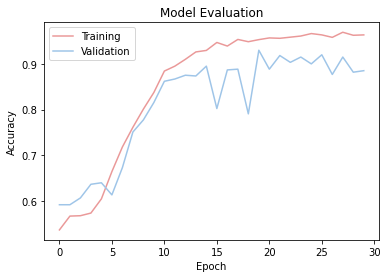

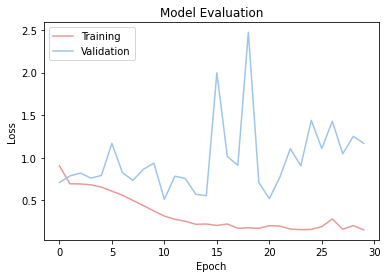

(<keras.callbacks.History at 0x1645552b0>,
 <keras.engine.functional.Functional at 0x164520f70>)

In [3]:
callback = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='../models/best_image_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
    )
]

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

helpers.run_model(
    [image_input],
    x,
    train_dataset,
    val_dataset,
    callback=callback,
    epochs=50,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>5.4 Model Evaluation</h1>
</div>

In [4]:
model = keras.models.load_model('../models/best_image_model.keras')
model.evaluate(test_dataset)

2022-09-01 05:26:35.453717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 2s 6ms/step - loss: 0.9429 - accuracy: 0.9133


[0.9428961277008057, 0.9133466482162476]

<div style="font-size: 30px; padding:10px">
<h1>5.5 Summary</h1>

<p>
The accuracy on the test dataset achieved using this model is <code>91.33%</code>. This accuracy is significantly lower than the test accuracy found on the graph model <code>95.51%</code>. 
</p>

</div>

----

<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">End of File</div>

----